In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import sys
import os
project_path = os.path.expanduser('~/repos/laplace_operator_metric_graph/')
sys.path.append(project_path)
import construct_graph
from helper_functions import style_plot

%load_ext autoreload
%autoreload 2

#### Import coefficients data
#### coefficients[num_Vs][seed] is the coefficient for aperiodic monotile with number of vertices = num_Vs and random seed = seed

In [3]:
with open("../../data/aperiodic_monotile_coefficients.pkl", "rb") as file:
    coefficients = pickle.load(file)

#### Verify that calculated coefficient matches loaded coefficient

In [5]:
# Patch sizes
nums_Vs_params = (np.linspace(9**0.5, 91**0.5, 21)**2)
# Number of patches (patch translations) to get statistics for patch size
translate_params = np.array(list(16 * np.ones(8)) + list(8 * np.ones(2)) + list(4 * np.ones(11))).astype(int)

size = 2
number = 3 

np.random.seed(0)

# Have to loop through because of the way the calculation was originally done with random seed = 0
for translation in range(number + 1):

    g = construct_graph.patch_graph.Aperiodic_Monotile(nums_Vs_params[size], translation * np.array([1, 1]))
    g = construct_graph.patch_graph.Patch(g)
    eq = construct_graph.patch_graph.Cell_Problem(g)
    xi = eq.solve_corrector_equation()

coefficient, K, C = eq.construct_homogenized_tensor(xi)

print(f"calculated coefficient \t = {coefficient}")
print(f"coefficient from data \t = {coefficients[size][number][2][0]}")

calculated coefficient 	 = 0.5768191397421534
coefficient from data 	 = 0.5768191397421534


#### Set up data for plotting

In [6]:
nums_Vs = []
means = []
stds = []

for en, d in enumerate(coefficients):
    all_Vs = [i[0] for i in d]
    all_coeffs = [i[2][0] for i in d]
    nums_Vs.append(np.mean(all_Vs).astype(int))
    means.append(np.mean(all_coeffs))
    stds.append(np.std(all_coeffs))

nums_Vs = np.array(nums_Vs)
means = np.array(means)
stds = np.array(stds)

cauchy_nums_Vs = nums_Vs[:-1]
cauchy_means = np.array([np.abs(means[i + 1] - means[i]) for i in range(len(means) - 1)])
cauchy_stds = np.array([np.abs(stds[i + 1] + stds[i]) for i in range(len(stds) - 1)])

x = cauchy_nums_Vs
y = cauchy_means
dy = cauchy_stds
y_ratio_upper = y * (1 + dy / y)
y_ratio_lower = y / (1 + dy / y)
y_err_upper = (y_ratio_upper - y)
y_err_lower = (y - y_ratio_lower)

### Plot

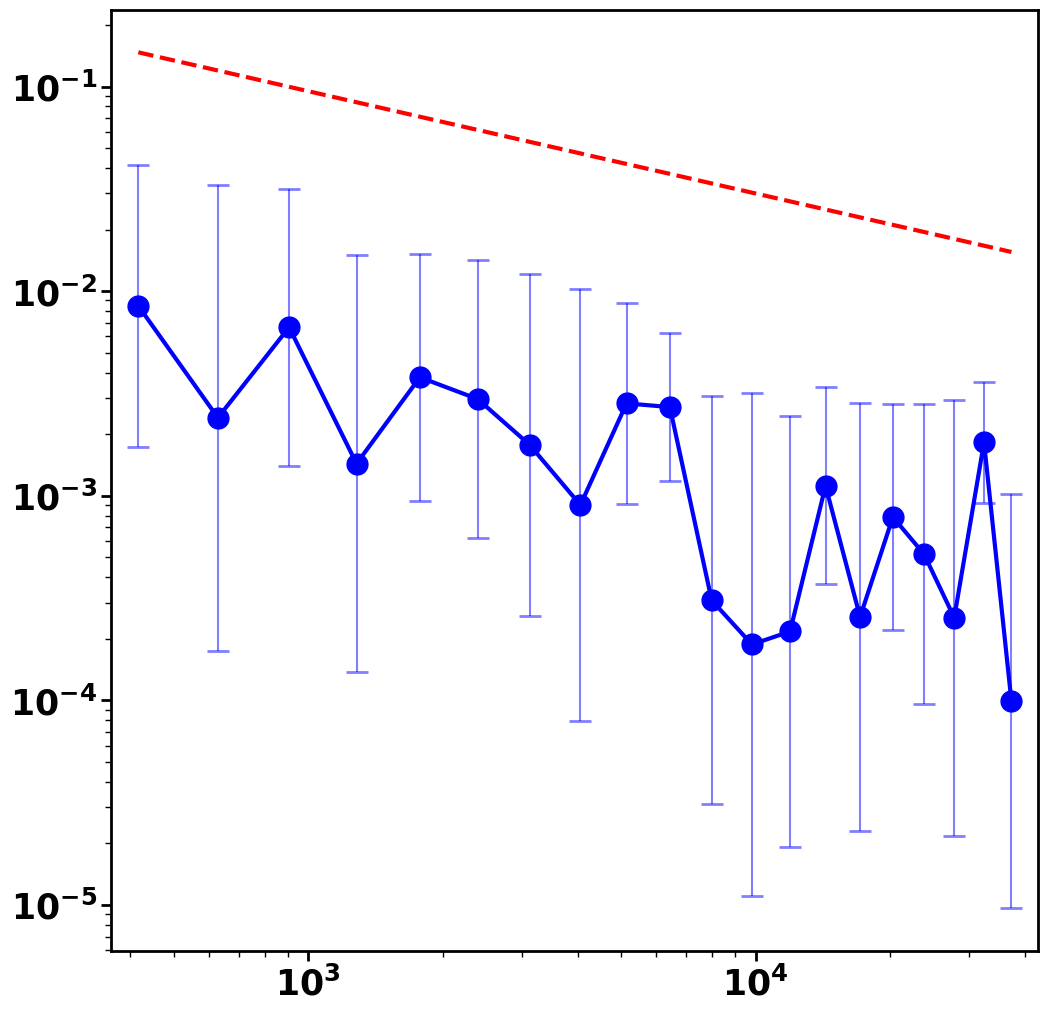

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

eigenvalue_linewidth = 3
eigenvalue_markersize = 15

ax.errorbar(x, y, yerr=[y_err_lower, y_err_upper], capsize=8, capthick=2, c='b', alpha=0.5, zorder=0)
ax.loglog(x, y, 'o-', c='b', linewidth=eigenvalue_linewidth, markersize=eigenvalue_markersize)

ax.loglog(x, x**(-0.5) * 3, '--', c='r', linewidth=eigenvalue_linewidth)

x_min, x_max = x.min(), x.max()
ax.set_xlim(10**(np.log10(x_min) - 0.06), 10**(np.log10(x_max) + 0.06))

style_plot(fig, ax, aspect=None)

plt.savefig("aperiodic_monotile_coefficients.pdf", bbox_inches="tight")

plt.show()